Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week 9 - Assignments
## Dimensionality reduction and feature selection

There are two graded assignements based on the examples shown in the classroom. Each completed assignment gives one point out of two. There are also two ungraded optional assignments.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Task 1 (1 point)

[Olivetti faces dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces) consists of 10x portaits of 40 individuals. Each portrait is a grayscale image with 64x64 pixels, thus the dimensionality of the problem is 4096 if we consider that each pixel is a feature. 

Apply feature selection to the dataset, identifying top 25% most important features based on the chi-squared criteria (you can use SelectPercentile).

What the test expects:
 * Use variables __X__ and __y__ for data and the corresponding labels.
 * The new dataset with 25% of features should be named __X_new__  

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.feature_selection import chi2

data = datasets.fetch_olivetti_faces()
X = data.data
y = data.target

chi2_vals = chi2(X, y)[0]
significant_chi2_features = np.argsort(chi2_vals)[int(4096*3/4):]
X_new = X[:,significant_chi2_features]

In [3]:
assert X.shape == (400, 4096)
assert y.shape == (400,)
assert X_new.shape == (400, 1024)

assert min(chi2(X_new, y)[0]) > min(chi2(X, y)[0])

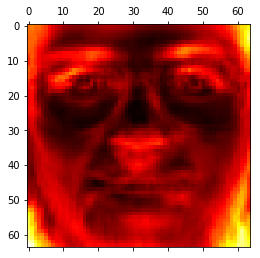

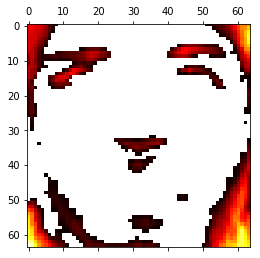

In [4]:
# You can visualize selected features on a 64x64 pixel heatmap for visual aid.
####################################### 
# chi2 score of each feature (pixel)
importances = np.array(chi2(X, y)[0])
plt.matshow(importances.reshape(64,64), cmap=plt.cm.hot)

# only top 25% of the most important features
min_chi2 = min(chi2(X_new, y)[0])
importances = np.where(importances < min_chi2, np.inf, importances)
plt.matshow(importances.reshape(64,64), cmap=plt.cm.hot)

### Optional exercise 1 (not graded) - NMF applied to faces

Have a look at the seminal paper that introduced NMF: http://www.columbia.edu/~jwp2128/Teaching/E4903/papers/nmf_nature.pdf

I hope you will become inspired to reproduce the original experiment by applying NMF to Olivetti faces dataset. Decompose faces into a desired number of components (try 8, then 16, for instance). Show the components as images. Due to non-negative nature of the procedure, the individual components can be interpreted as facial features.


In [5]:
# YOUR CODE HERE
pass

## Task 2 (1 point)

Apply tSNE to the digits dataset (transform to 2D). Digits dataset has about 180 samples per class, so we should set perplexity=180 in tSNE accordingly. Afterwards, perform K-means clustering into 10 clusters in 2D feature space obtained after tSNE transformation. Calculate sklearn.metrics.adjusted_rand_score between the labels obtained in clustering and the original digit labels. http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

What the test expects:
 * Use variables __X__ and __y__ for data and the corresponding labels.
 * tSNE-transformed 2D dataset should be named __X_new__
 * The variable holding Adjusted Rand Score should be named __score__
 * The variable holding cluster labels assigned by KMeans should be named __y_new__

In [6]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

X = datasets.load_digits()['data']
y = datasets.load_digits()['target']

X_new = TSNE(perplexity=180).fit_transform(X)
y_new = KMeans(n_clusters=10).fit_predict(X_new)
score = adjusted_rand_score(y_new, y)

In [7]:
assert X.shape == (1797, 64)
assert X_new.shape == (1797, 2)
assert y.shape == (1797, )
assert y_new.shape == (1797, )
print(score)
assert score > 0.7

0.8444216022659821


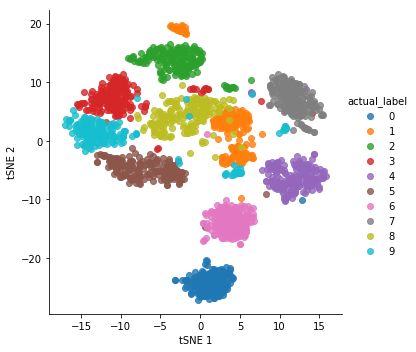

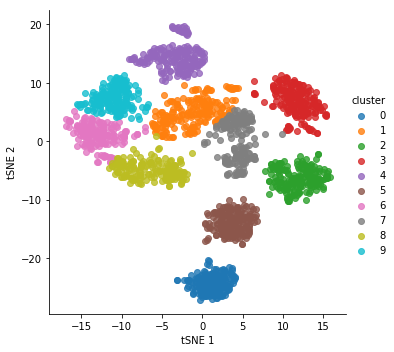

In [8]:
# Visualization:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'tSNE 1': X_new[:, 0], 'tSNE 2': X_new[:, 1], 'actual_label': y, 'cluster': y_new})
sns.lmplot(data=df, x='tSNE 1', y='tSNE 2', hue='actual_label', fit_reg=False)
sns.lmplot(data=df, x='tSNE 1', y='tSNE 2', hue='cluster', fit_reg=False)

## 3. Optional exercise 2 (not graded) - Comparing clustering before and after NMF

Use BRCA gene expression dataset (measured with antibodies on a protein level) that we used in the class.

1. Apply Kmeans clustering (3 clusters) to the original expression data first;
1. Perform NMF decomposition with 5 components, we will need the low-dimensional transformed data (H matrix)
1. Apply Kmeans (3 clusters) to the result of NMF decomposition.
1. Use Adjusted Rand Index (ARI) to compare clustering labels obtained on steps 1 and 3

Hint: In my solution I obtained an ARI of about 0.67

In [9]:
# YOUR CODE HERE
pass